# 01. Знакомство с `torch.Tensor`

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [1]:
import torch

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [2]:
# Ну вот одной операцией. Быстрее точно никак

torch.tensor([
    [-4, -3, -2, -6, -5, -2, -3, -4],
    [-1, -1, -1, -1, -1, -1, -1, -1],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [4, 3, 2, 6, 5, 2, 3, 4],
], dtype=torch.float16)

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]], dtype=torch.float16)

1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [3]:
temp = torch.arange(2, 21, step=2)
temp *= (temp + 1)
temp

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])

1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [4]:
# Строки
torch.arange(1, 8)

tensor([1, 2, 3, 4, 5, 6, 7])

In [5]:
# столбцы
torch.arange(0, 101, step=10).reshape(-1, 1)

tensor([[  0],
        [ 10],
        [ 20],
        [ 30],
        [ 40],
        [ 50],
        [ 60],
        [ 70],
        [ 80],
        [ 90],
        [100]])

In [6]:
# А теперь magic
torch.arange(0, 101, step=10).reshape(-1, 1) + torch.arange(1, 8)

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [7]:
def wtf_function(n, m):
    pattern = torch.tensor([[0, 1],
                            [2, 3]])
    # Замещаем пространство, а затем вырезаем нужный размер
    return pattern.repeat(n, m)[:n,:m]


In [8]:
wtf_function(4, 5)

tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2]])

1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

In [9]:
# тензор случайных равномерно распр. чисел
a = torch.empty(4, 7).uniform_(0, 20)
a

tensor([[ 8.2851, 14.7221,  7.4614, 19.1693, 11.5459,  8.7647,  9.0030],
        [10.3729, 10.1385, 12.3628, 10.9874, 18.5585,  9.6367,  5.1394],
        [ 3.6856, 14.6219, 16.7990, 10.2653, 12.2240, 12.8043,  9.3271],
        [13.1189, 18.6469,  3.6756, 17.8260,  7.7434,  3.7212,  1.3630]])

In [10]:
# Нормализация
( a - a.min() ) / (a.max() - a.min() )

tensor([[0.3887, 0.7502, 0.3425, 1.0000, 0.5719, 0.4157, 0.4291],
        [0.5060, 0.4928, 0.6177, 0.5405, 0.9657, 0.4647, 0.2121],
        [0.1304, 0.7446, 0.8669, 0.5000, 0.6100, 0.6425, 0.4473],
        [0.6602, 0.9707, 0.1299, 0.9246, 0.3583, 0.1324, 0.0000]])

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в массивах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [11]:
t1 = torch.randint(0, 11, (4, 7))
print(t1)
t2 = torch.randint(0, 11, (4, 7))
print(t2)

torch.max(t1, t2)

tensor([[7, 8, 5, 5, 0, 8, 7],
        [0, 6, 3, 1, 0, 9, 3],
        [2, 6, 3, 3, 5, 6, 1],
        [0, 8, 1, 7, 7, 3, 7]])
tensor([[10,  9,  3,  0,  6,  4,  1],
        [ 2,  1,  5,  6,  9,  5,  9],
        [ 7,  3,  2,  5,  5,  6, 10],
        [ 1,  0,  3,  3, 10,  3,  1]])


tensor([[10,  9,  5,  5,  6,  8,  7],
        [ 2,  6,  5,  6,  9,  9,  9],
        [ 7,  6,  3,  5,  5,  6, 10],
        [ 1,  8,  3,  7, 10,  3,  7]])

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [12]:
# Создаем тензор
t = torch.randint(0, 101, (20,))
print(t)
# Выбираем второе сверху число (По идее нужно уникальное)
second_top_number = t.unique(sorted=True)[-2]
print(second_top_number)
# Выводим его индекс
(t == second_top_number).nonzero().item()

tensor([ 93,  27, 100,  14,  28,  55,  44,   9,  49,  94,  41,  89,  70,   8,
         23,   2,  10,  10,  18,  25])
tensor(94)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:766.)
  


9

## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [13]:
torch.arange(1, 8) + torch.arange(0, 101, step=10).reshape(-1, 1)

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [14]:
a_2d = torch.tensor([
    [3, 3, 3],
    [4, 4, 4],
    [5, 5, 5],
])
b_1d = torch.tensor([1, 2, 3])

# Меняем размер и вычитаем
a_2d - b_1d.reshape(-1, 1)

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
array([1, 3, 5, 7])
```

In [15]:
a = torch.tensor([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])
b = torch.tensor([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])
(a == b).nonzero().reshape(1,-1)

tensor([[1, 3, 5, 7]])

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [16]:
torch.arange(9).view(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [17]:
torch.arange(9).view(3,3).flip([1,0])

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = np.array([2, 6, 1, 9, 10, 3, 27])
```

Ожидается резульат:

```python
array([6, 9, 10])
```

In [18]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
a[(a >= 5) & (a <= 10)]

tensor([ 6,  9, 10])

1.3.4 Поменять местами столбец 1 и 2 тензора `np.arange(9).reshape(3,3)`

In [19]:
t = torch.arange(9).reshape(3, 3)
t[:, [1, 2]] = t[:, [2, 1]]
t

tensor([[0, 2, 1],
        [3, 5, 4],
        [6, 8, 7]])

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [20]:
t = torch.randint(0, 11, size=(8, 10))
t

tensor([[ 1,  4,  0,  3,  1,  4,  1,  7,  9,  1],
        [ 9,  8,  3,  1,  8,  6,  1,  7,  1,  8],
        [ 2,  5,  1,  2,  6,  6,  9, 10,  0,  9],
        [10, 10,  8,  0,  6,  1,  5,  0,  1,  8],
        [ 3,  5,  7,  6,  1,  7,  2,  5,  8,  1],
        [ 0,  9,  4,  8,  1,  4,  2,  5,  2,  9],
        [ 3,  7,  3,  4,  7,  5,  6,  8,  4,  5],
        [ 7,  6,  9,  7,  1, 10,  6,  0,  9,  0]])

In [21]:
index = t.sum(1).argmin()
index

tensor(0)

In [22]:
t[index]

tensor([1, 4, 0, 3, 1, 4, 1, 7, 9, 1])

1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [23]:
t = torch.randint(0, 101, size=(20,))
print(t)
t.clamp(min=30, max=70)

tensor([98, 70, 77, 22, 87, 92, 85, 92, 60, 47, 67, 92, 55, 71,  3, 23, 69, 56,
         5,  5])


tensor([70, 70, 70, 30, 70, 70, 70, 70, 60, 47, 67, 70, 55, 70, 30, 30, 69, 56,
        30, 30])

1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [24]:
t1 = torch.randint(0, 11, size=(30, 3))
t2 = torch.randint(0, 11, size=(30, 3))
t1[t1 > t2].sum()

tensor(246)

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [25]:
t = torch.randint(0, 11, size=(20, 20))
#print(t)
t[torch.arange(0, 19), # По вертикали на один элемент меньше
  torch.arange(1, 20)] # По горизонтали тоже

tensor([ 3,  9,  8,  7,  4,  1, 10,  6,  8,  7,  4,  6,  6,  4,  3,  2,  1,  7,
         5])

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [26]:
t1 = torch.randint(0, 11, size=(5, 10))
t2 = torch.randint(0, 11, size=(5, 10))
t1, t2

(tensor([[ 6,  1,  8, 10,  9,  1,  8,  4,  6,  7],
         [ 2,  2,  6,  9,  6,  5,  0,  5,  5,  8],
         [ 5,  4,  0,  1,  6,  1,  0,  8,  9,  8],
         [ 7, 10,  1,  9,  0,  9,  6,  1,  0,  9],
         [ 1, 10,  2,  9,  7,  2,  0,  5,  5,  1]]),
 tensor([[ 8,  5, 10,  9,  9,  4,  4,  0,  3,  1],
         [ 8,  2,  4,  6,  0,  7,  8,  2,  8,  4],
         [ 9,  6,  9,  8,  1,  2,  2,  1,  0,  6],
         [ 7,  7,  3,  2,  7,  5,  4,  9,  3,  7],
         [ 2,  6,  0,  4,  4,  9,  7,  0,  7,  9]]))

In [27]:
t1[t1 == t2] *= 2
t1

tensor([[ 6,  1,  8, 10, 18,  1,  8,  4,  6,  7],
        [ 2,  4,  6,  9,  6,  5,  0,  5,  5,  8],
        [ 5,  4,  0,  1,  6,  1,  0,  8,  9,  8],
        [14, 10,  1,  9,  0,  9,  6,  1,  0,  9],
        [ 1, 10,  2,  9,  7,  2,  0,  5,  5,  1]])

1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [28]:
ar1 = torch.randint(0, 11, size=(4, 7))
ar2 = torch.randint(0, 11, size=(4, 7))
ar3 = torch.randint(0, 11, size=(4, 7))
ar1, ar2, ar3

(tensor([[ 9,  8,  6,  6,  0,  7,  3],
         [ 3,  6,  9,  8,  0,  3,  2],
         [ 9, 10, 10,  1,  6,  6,  8],
         [ 2,  3,  9,  0,  1,  6, 10]]),
 tensor([[ 8,  2,  4,  6,  1,  1,  5],
         [10,  2, 10,  7,  7, 10,  0],
         [ 4,  1,  8,  9,  8,  0,  4],
         [ 5,  0,  4,  1,  6,  1,  3]]),
 tensor([[ 8,  5,  8,  8,  1,  8,  7],
         [ 4,  7,  7,  4,  8,  2,  8],
         [ 2,  9,  8,  5,  4, 10,  0],
         [ 6,  8,  5,  8,  9,  7,  7]]))

In [29]:
ar1[(ar1 > ar2) & (ar1 < ar3)] = 0
ar1

tensor([[ 9,  8,  0,  6,  0,  0,  3],
        [ 3,  0,  9,  8,  0,  3,  0],
        [ 9, 10, 10,  1,  6,  0,  8],
        [ 2,  0,  9,  0,  1,  0, 10]])

1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [30]:
t1 = torch.randint(0, 21, size=(20, 5))
t1

tensor([[ 5,  9,  1,  6, 20],
        [15, 16, 14, 15, 12],
        [16,  7,  7,  3,  8],
        [12, 12,  6,  9, 12],
        [17, 19, 17, 10, 19],
        [ 0, 14,  1,  5,  5],
        [16,  2,  0,  9, 19],
        [ 2,  5, 19,  2,  6],
        [15, 18,  4, 10, 10],
        [ 0, 20,  3, 17,  1],
        [16,  4, 13, 19, 18],
        [ 5,  2,  8,  4,  2],
        [16,  5, 18, 13, 17],
        [ 1, 15, 19, 15,  2],
        [ 1, 11, 13,  7,  7],
        [19,  0, 20, 14, 15],
        [13,  6, 17, 14, 18],
        [ 4, 11, 19, 13,  8],
        [ 4, 14, 10,  7,  7],
        [ 8, 19, 19, 12,  8]])

In [31]:
t1.argmax(1) # Максимум по строкам

tensor([4, 1, 0, 4, 4, 1, 4, 2, 1, 1, 3, 2, 2, 2, 2, 2, 4, 2, 1, 2])

In [32]:
rows, counts = t1.argmax(1).unique(return_counts=True) # Сколько каких значений

In [33]:
rows[counts >= 5]

tensor([1, 2, 4])

In [34]:
row_max_indices = ar1.argmax(1)
rows, counts = row_max_indices.unique(return_counts=True)
rows[counts >= 5]

tensor([], dtype=torch.int64)

1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива. 

In [35]:
t1 = torch.rand(4, 7)
t1

tensor([[0.9360, 0.4499, 0.7664, 0.6149, 0.2243, 0.8164, 0.0427],
        [0.4449, 0.8261, 0.8374, 0.2620, 0.5310, 0.0626, 0.7756],
        [0.8616, 0.9162, 0.1609, 0.1809, 0.0821, 0.9869, 0.4932],
        [0.4106, 0.5223, 0.7683, 0.0335, 0.0654, 0.2271, 0.9033]])

In [36]:
t1.max(), t1.argmax() # Макс элемент и его порядковый номер

(tensor(0.9869), tensor(19))

In [37]:
i = t1.argmax() % ar1.shape[0]
j = t1.argmax() % ar1.shape[1]
t1[i+1 : , j+1 : ] = 0
t1


tensor([[0.9360, 0.4499, 0.7664, 0.6149, 0.2243, 0.8164, 0.0427],
        [0.4449, 0.8261, 0.8374, 0.2620, 0.5310, 0.0626, 0.7756],
        [0.8616, 0.9162, 0.1609, 0.1809, 0.0821, 0.9869, 0.4932],
        [0.4106, 0.5223, 0.7683, 0.0335, 0.0654, 0.2271, 0.9033]])

1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [38]:
from torch.nn import functional

In [39]:
t = torch.tensor([2, 3, 2, 2, 2, 1])
t

tensor([2, 3, 2, 2, 2, 1])

In [40]:
t - 1

tensor([1, 2, 1, 1, 1, 0])

In [41]:
functional.one_hot(t - 1)

tensor([[0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0]])

1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая. 

In [42]:
t = torch.randint(0, 101, size=(20,))
print(t)
mode, _ = torch.mode(t)
mode, (t == mode).nonzero(as_tuple=True)[0]  # noqa

tensor([79, 30, 40,  9, 91, 18, 15, 47, 86, 88, 66, 77, 53, 34, 80, 61, 39, 66,
        72,  0])


(tensor(66), tensor([10, 17]))

## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [43]:
x = torch.linspace(0, 10, 100)
y = x * torch.sin(x)

interval = x[y > 0.5]
interval[0], interval[-1]

(tensor(0.8081), tensor(9.2929))

1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [44]:
def distance(a, b):
    # считаем вклидово расстояние
    return torch.sqrt(torch.sum((a - b) ** 2, dim=0))

a = torch.tensor([1., 2., 3., 4., 5.])
b = torch.tensor([6., 7., 8., 9., 10.])

distance(a,b)

tensor(11.1803)

1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [45]:
t = torch.randint(0, 100, size=(20, 3))

In [46]:
t[(t ** 2).sum(1).argsort()] # Считаем расстояние как корень из суммы квадратов. Но для сортировки это нам не важно

tensor([[35,  3, 31],
        [ 7,  8, 54],
        [23, 48, 14],
        [42, 26, 30],
        [28, 35, 52],
        [65, 39, 12],
        [71, 32,  5],
        [61, 17, 65],
        [ 6, 78, 52],
        [42, 26, 85],
        [64, 39, 66],
        [22, 95, 33],
        [21, 96, 34],
        [74,  2, 87],
        [93,  8, 74],
        [88, 40, 75],
        [93, 94, 22],
        [21, 92, 96],
        [64, 89, 79],
        [80, 64, 98]])

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [47]:
t = torch.rand((100,))
k = 0.8
# Считаем индекс наиболее близкого по модулю значения
i = (t - k).abs().argmin()
# выводим индекс и значение
print(f't[{i}] = {t[i]}')

t[19] = 0.8124757409095764


1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [48]:
A = torch.tensor([[-1, 2, 4],
                  [-3, 1, 2],
                  [-3, 0, 1],], dtype=torch.float)
B = torch.tensor([[3, -1],
                  [2, 1],], dtype=torch.float)
C = torch.tensor([[7, 21],
                  [11, 8],
                  [8, 4],], dtype=torch.float)

In [49]:
torch.matmul(torch.matmul(torch.inverse(A), -C), 
             torch.inverse(B)
            )

tensor([[ 1.0000e+00,  1.1921e-07],
        [-2.0000e+00,  1.0000e+00],
        [ 3.0000e+00, -4.0000e+00]])

1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами. 

In [56]:
from matplotlib import pyplot as plt

In [60]:
t = torch.normal(mean=0, std=10, size=(200,))

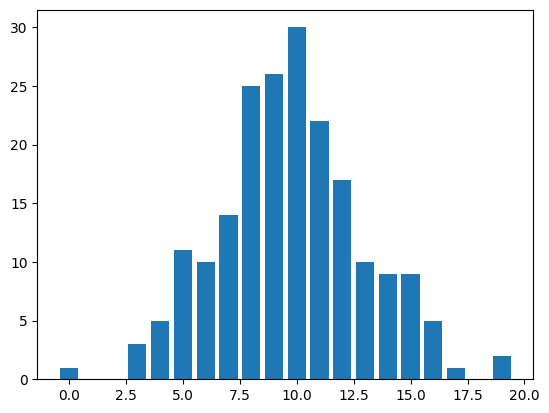

In [67]:
bins = 20
hist =  torch.histc(t, bins)
x = range(bins)
plt.bar(x, hist)
plt.show()